In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
df_unclean = pd.read_csv("data/cars_hw.csv")

# Check basic info
print(df_unclean.info())
print(df_unclean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB
None
       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963

In [9]:
# Remove rows with missing values
df = df_unclean.dropna()

In [10]:
# Drop the unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert No_of_Owners to numeric
df['No_of_Owners'] = df['No_of_Owners'].str.extract('(\d+)').astype(float)

# Convert Transmission to numeric (extract speed if applicable)
df['Transmission'] = df['Transmission'].str.extract('(\d+)').astype(float)

# Apply log transformation to skewed numerical columns
df['Price'] = np.log1p(df['Price'])
df['Mileage_Run'] = np.log1p(df['Mileage_Run'])

# Remove outliers using IQR method
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    return data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]

for col in ['Price', 'Mileage_Run']:
    df = remove_outliers(df, col)

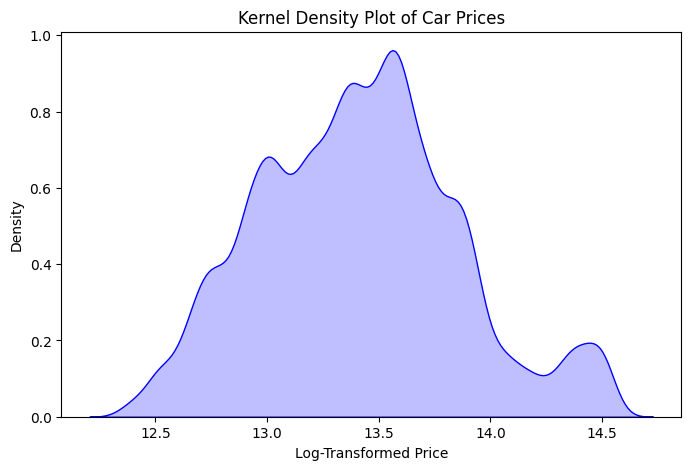

In [11]:
# Kernel density plot of price
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Price'], fill=True, color='blue', bw_adjust=0.5)
plt.xlabel("Log-Transformed Price")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Car Prices")
plt.show()

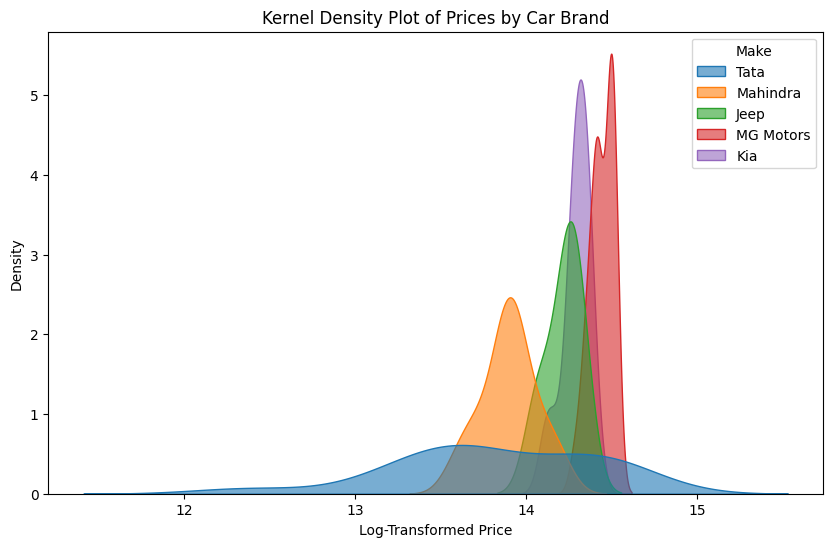

In [15]:
# Select top 5 most expensive brands by median price
top_brands = df.groupby('Make')['Price'].median().nlargest(5).index

# Filter dataset to include only top brands
df_top_brands = df[df['Make'].isin(top_brands)]

# Kernel density plot for prices by brand
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_top_brands, x="Price", hue="Make", fill=True, common_norm=False, alpha=0.6)
plt.xlabel("Log-Transformed Price")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Prices by Car Brand")
#plt.legend(title="Make")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Select features and target variable
features = ['Mileage_Run', 'No_of_Owners', 'Transmission']  # Modify based on dataset availability
target = 'Price'

# Drop any remaining missing values (if needed)
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features + [target])

# Prepare feature matrices and target vectors
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Fit a simple linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

Train RMSE: 0.3661, Train R²: 0.3035
Test RMSE: 0.4087, Test R²: 0.2893


In [21]:
# Select features and target variable
features = ["Make_Year", "Mileage_Run", "Seating_Capacity"]  # Modify based on dataset availability
target = 'Price'

# Drop any remaining missing values (if needed)
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features + [target])

# Prepare feature matrices and target vectors
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Fit a simple linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

Train RMSE: 0.3338, Train R²: 0.4212
Test RMSE: 0.3652, Test R²: 0.4324


In [22]:
# Select features and target variable
features = ["Make_Year", "Mileage_Run", "Seating_Capacity", 'No_of_Owners', 'Transmission']  # Modify based on dataset availability
target = 'Price'

# Drop any remaining missing values (if needed)
train_df = train_df.dropna(subset=features + [target])
test_df = test_df.dropna(subset=features + [target])

# Prepare feature matrices and target vectors
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Fit a simple linear model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

Train RMSE: 0.2947, Train R²: 0.5488
Test RMSE: 0.3262, Test R²: 0.5473


Model 3 is the best model because:
- It has the lowest RMSE (0.2947 for training, 0.3262 for testing), indicating the smallest average error in price predictions.
- It has the highest R² (0.5488 for training, 0.5473 for testing), meaning it explains the most variance in the price data.

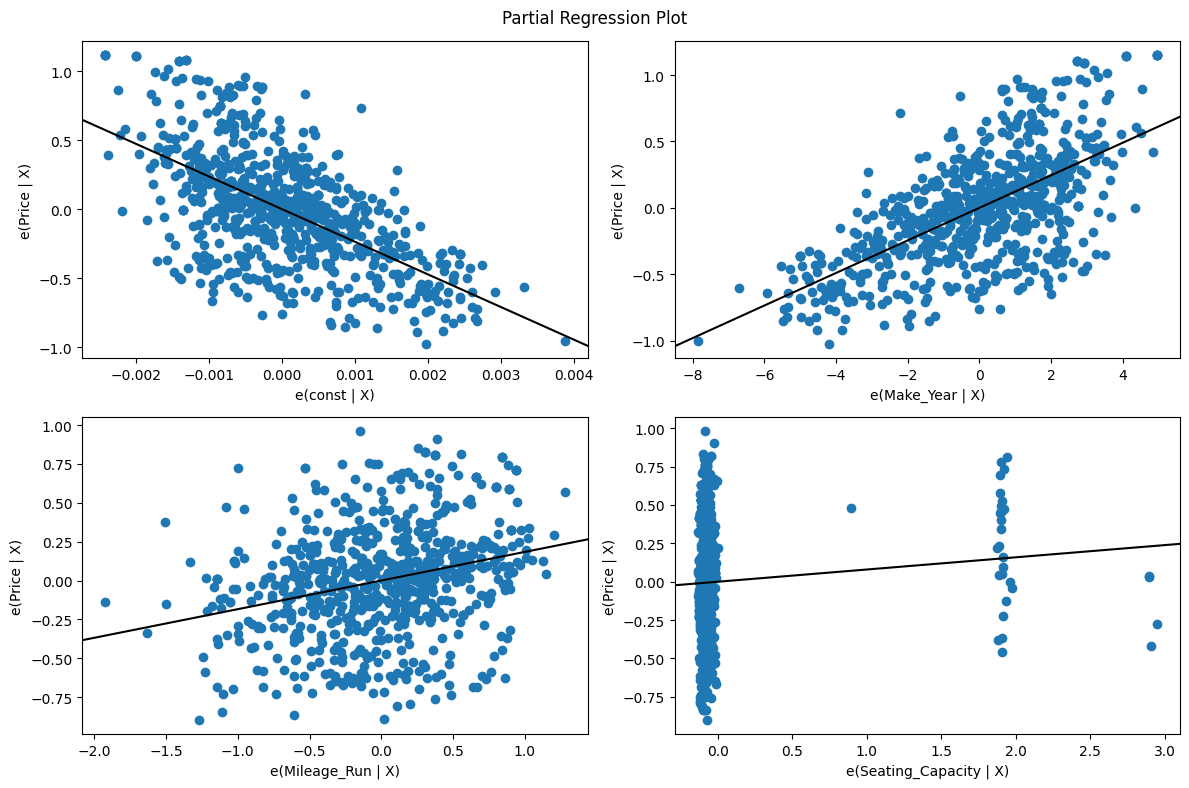

In [24]:
import statsmodels.api as sm

# Define features and target
features = ["Make_Year", "Mileage_Run", "Seating_Capacity"]
target = 'Price'

# Add constant term for intercept
X_train_sm = sm.add_constant(train_df[features])
y_train_sm = train_df[target]

# Fit OLS regression model
model_sm = sm.OLS(y_train_sm, X_train_sm).fit()

# Generate partial regression plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()

Seating capacity does not follow a linear relationship, due to the nature of the variable (and cars, in general). Additionally, mileage_run, while slightly linear, is not perfectly linear. For seating capacity, the issue likely arises because it is a categorical or discrete numeric variable rather than a continuous one. Cars typically have standard seating capacities (e.g., 2, 4, 5, 7), meaning the variable takes on only a few distinct values. For mileage_run, the partial regression plot suggests a possible non-linear relationship, meaning higher mileage may not decrease price at a constant rate

In [25]:
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Add constant term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit OLS regression model
model = sm.OLS(y_train, X_train).fit()

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Train RMSE: {train_rmse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

Train RMSE: 0.3338, Train R²: 0.4212
Test RMSE: 0.3652, Test R²: 0.4324


The complex model performed worse than the best simple model, as:
- Higher RMSE (both train & test): Predictions are slightly less accurate
- Lower R²: The model explains less variance in price
- Overfitting is not a major issue (Train and Test scores are similar)

Initial Data Cleaning & Exploration:
- Removed missing values and unnecessary columns.
- Converted categorical variables (e.g., Transmission, No_of_Owners) to numeric.
- Applied log transformation to Price and Mileage_Run to reduce skewness.
- Removed outliers using the IQR method.

Simple Linear Models:
- Built multiple linear regression models with basic features.
- The best simple model had Train RMSE: 0.2947, Test RMSE: 0.3262, with an R² of ~0.55. This showed that the model captured some variance in price but had room for improvement.

Partial Correlation Plots:
- Identified non-linear relationships in Seating Capacity and Mileage_Run.
- Suggested that transformations or interactions might help model performance.

Complex Model with Interactions & Transformations:
- Introduced interactions (e.g., Mileage * Transmission) and polynomial terms.
- Surprisingly, the model performed worse than the best simple model:
    - Train RMSE: 0.3338, Test RMSE: 0.3652 R² dropped to ~0.42
- This indicated that the additional complexity did not improve predictions.

Overfitting & Underfitting Insights:
- The simple models did not overfit, as train/test performance was similar.
- The complex model had lower train R², suggesting some underfitting (it didn’t improve generalization).

Model Selection Takeaways:
- More complexity does not always mean better performance.
- Feature engineering is critical—some interactions help, others add noise.
- Testing different transformations (e.g., square root vs. log) is important.